# Logistic function
wiki: https://en.wikipedia.org/wiki/Logistic_function

<IPython.core.display.Javascript object>


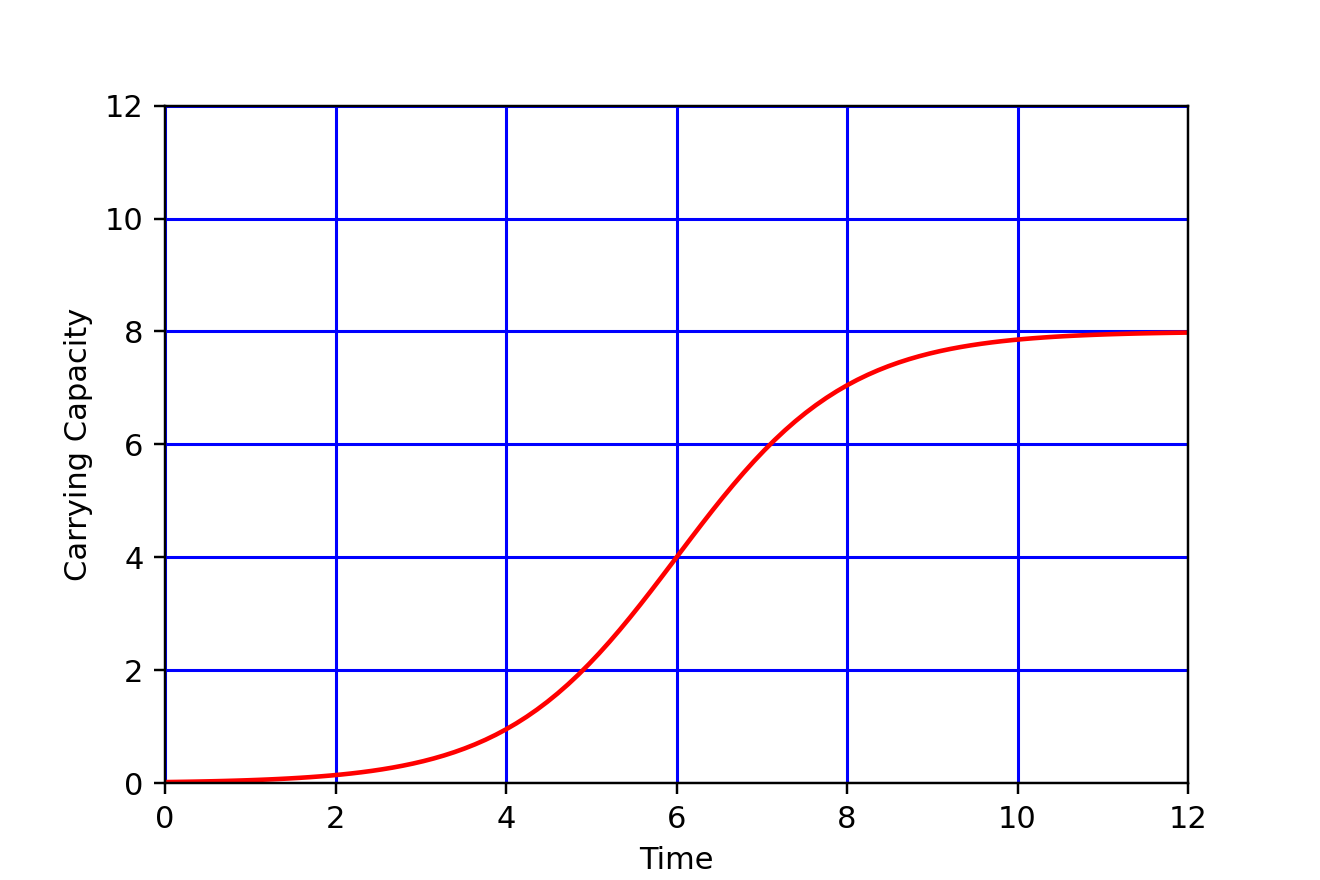

interactive(children=(IntSlider(value=8, description='c', max=12), FloatSlider(value=1.0, description='k', max…

In [2]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis([0, 12, 0, 12])
ax.grid(color='b', linestyle='-', linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Carrying Capacity')
 
# generate x values
x = np.linspace(0, 12, 100)
 
def logistic(x,c,k,x0):
    return np.array([c/(1+math.exp(-k*(x-x0))) for x in x])
 
@widgets.interact(c=(0, 12, 1), k=(0, 2, 0.05), x0=(0, 10, 1), clean = True)
def update(c = 8, k = 1, x0 = 6, clean=True):
    """Remove old lines from plot and plot new one"""
    if clean:
        [l.remove() for l in ax.lines]
    else:
        None
    ax.plot(x, logistic(x,c,k,x0), color='r')